## Finite State Machine (FSM)

(Text and examples modified and borrowed from the one and only [Prof. Jeff Erickson](http://algorithms.wtf/#models))

A finite-state machine is a formal model of any system/machine/algorithm that can exist in a finite number of states. Transitions among these states is based on a sequence of input symbols. For example, the following algorithm `MultipleOf5` determines whether a binary string `w[0..n-1]` of bits represents a multiple of 5:

In [4]:
def mutlipleOf5(w):
    rem, n = 0, len(w)
    for i in range(n):
        rem = (2 * rem + ord(w[i])) % 5
    if rem == 0:
        return True
    else:
        return False

(We can test this function out. **12** is **1100** in binary while **15** is **1111** in binary. So, `multipleOf5("1100")` should return `False` while `multipleOf5("1111")` should return `True`. Try it out yourself!)

In [5]:
print(mutlipleOf5("1100"))
print(mutlipleOf5("1111"))

False
True


We can envision the variable `rem` having 5 distinct values: 0, 1, 2, 3, 4, and can consequently represent it using a FSM with each state s1, s2, s3, s4 representing a possible value of `rem`.

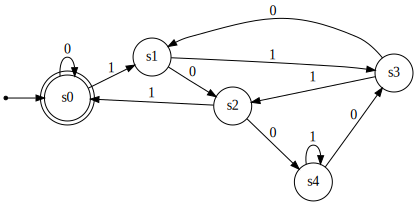

In [6]:
from automata.fa.dfa import DFA

mutlipleOf5_fsm = DFA(
    states={'s0', 's1', 's2', 's3', 's4'},
    input_symbols={'0', '1'},
    transitions={
        's0': {'0': 's0', '1': 's1'},
        's1': {'0': 's2', '1': 's3'},
        's2': {'0': 's4', '1': 's0'},
        's3': {'0': 's1', '1': 's2'},
        's4': {'0': 's3', '1': 's4'}
    },
    initial_state='s0',
    final_states={'s0'}
)

mutlipleOf5_fsm

Run the code below a few times to verify its correctness for youself:

In [7]:
if mutlipleOf5_fsm.accepts_input(input('Please enter your input: ')):
    print('Accepted')
else:
    print('Rejected')

Accepted


## DFAs

Finite-State Machines are also known as deterministic finite-state automata. It's "deterministic" because the behavior of the machine is completely determined by the input strings. (We will cover NFAs –– non-deterministic finite-state automata –– in a later section.)

Formally, every finite-state machine consists of five components:
1. A finite set $\Sigma$, the **input alphabet**.
2. Another finite set $Q$, the **states**.
3. A **transition** function $\delta: Q \times \Sigma \rightarrow Q$.
4. A **state state** $s \in Q$.
5. A subset $A \subseteq Q$ of **accepting states**.

Scroll above and note how `mutlipleOf5_fsm` is precisely defined by these five components as inputs.

### How does it work?
The behavior of a finite-state machine is governed by an input string $\omega$, which is a finite
sequence of symbols from the input alphabet $\Sigma$. 

The machine reads the symbols in $\omega$ one at a time in order (from left to right). At all times, the machine has a current state $q$; initially $q$ is the machine’s start state $s$. Each time the machine reads a symbol $a$ from the input string, its current state transitions from $q$ to $\delta(q, a)$. 

After all the characters have been read, the machine accepts $\omega$ if the current state is in $A$ and rejects $\omega$ otherwise. 

#### Let's explore another example:
The following DFA accepts all binary strings ending in an odd number of '1's. Write out a few binary strings for yourself and trace through the graph to prove its correctness. $q_1$ is the only accepting state, denoted by the concentric circles.

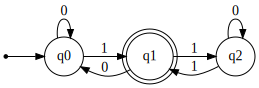

In [8]:
odd_ones_ending_dfa = DFA(
    states={'q0', 'q1', 'q2'},
    input_symbols={'0', '1'},
    transitions={
        'q0': {'0': 'q0', '1': 'q1'},
        'q1': {'0': 'q0', '1': 'q2'},
        'q2': {'0': 'q2', '1': 'q1'}
    },
    initial_state='q0',
    final_states={'q1'}
)

odd_ones_ending_dfa

The start state, $q_0$ is denoted by the unattached arrow pointing at it. The string "1" would be accepted because you would navigate from $q_0$ to $q_1$. "11" would create the chain $q_0 \to q_1 \to q_2$, which would be rejected. "111" would return to $q_1$, and be accepted.

Careful analysis shows that that this DFA, with three states and six transitions can be written more with only two states and three transitions:

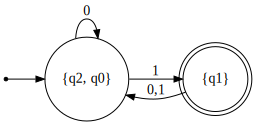

In [9]:
minimal_odd_ones_ending_dfa = odd_ones_ending_dfa.minify(retain_names=True)
minimal_odd_ones_ending_dfa

Notice how this **minimal DFA** `minimal_odd_ones_ending_dfa` accepts and rejects all the strings that `odd_ones_ending_dfa` does. We say that both `minimal_odd_ones_ending_dfa` and `odd_ones_ending_dfa` have the same language. 

## Finite State Automata and Formal Languages

The language of a finite state machine $M$, denoted $L(M)$, is the set of all strings in $\Sigma^{*}$<a name="cite_ref-1"></a>[<sup>[1]</sup>](#cite_note-1) that *M* accepts. More formally, if $M = (\Sigma, Q, \delta, s, A)$, then $L(M) := \{w \in \Sigma^{*} \mid \delta^{*}(s, w) \in A\}$<a name="cite_ref-2"></a>[<sup>[2]</sup>](#cite_note-2). We call a language **automatic**, or **regular**, if it is the language of some finite state machine.

Reuglar languages have several closure properties –– Let $L$ and $L'$ be arbitrary regular languages over an arbitrary alphabet $\Sigma$. Then,
-  $\bar L = \Sigma^{*}\backslash L$ is regular,
-  $L \cup L'$ is regular,
-  $L \cap L'$ is regular,
-  $L \backslash L'$ is regular, and
-  $L \oplus L'$ is regular.

By Kleene's Theorem, for any regular expression R, there is a DFA $M$ such that $L(R) = L(M)$. For any DFA $M$, there is a regular expression $R$ such that $L(M) = L(R)$, which implies that the set of ***regular*** languages is also closed under the simple boolean operations defined above. We are going through this very quickly and very briefly –– please refer to [these lecture notes](https://jeffe.cs.illinois.edu/teaching/algorithms/models/03-automata.pdf) for more detail.

### Closure Property Examples
We can easily create a DFA that accepts all binary strings except for those that end in an odd number of 1's:

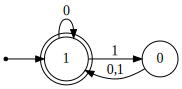

In [10]:
odd_ones_ending_dfa.complement(retain_names=False, minify=True)

Trace it through with some examples to prove its correctness to yourself.

Next, we can construct a DFA that accepts all binary strings that represent a multiple of 5 OR end in an odd number of 1's:

In [11]:
union_dfa = mutlipleOf5_fsm.union(odd_ones_ending_dfa, retain_names=False, minify=True)
if union_dfa.accepts_input(input('Please enter your input: ')):
    print('Accepted')
else:
    print('Rejected')

Accepted


Notice how '111' (7 in decimal) and '1111' (15 in decimal) are both accepted?

We can also use the intersection operation to contructor a DFA that accepts only binary strings that represent a multiple of 5 AND end in a odd number of 1's: 

In [12]:
intersection_dfa = mutlipleOf5_fsm.intersection(odd_ones_ending_dfa, retain_names=False, minify=True)
if intersection_dfa.accepts_input(input('Please enter your input: ')):
    print('Accepted')
else:
    print('Rejected')

Rejected


Now, both '111' (7 in decimal) and '1111' (15 in decimal) are rejected; however, '101' (5 in decimal) is accepted because it satisfies both conditions.

## Creation Functions

Now that we've covered the basics, we can move to the more advanced creation functions.

`from_substring` "directly computes the minimal DFA recognizing strings containing the given substring." For example, if I want a DFA that accepts binary strings that contain the substring "101", I can write the following:

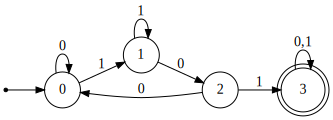

In [13]:
one_zero_one_substring_dfa = DFA.from_substring(
    input_symbols={'0', '1'},
    substring="101",
    contains=True,
    must_be_suffix=False
)

one_zero_one_substring_dfa

Notice how the DFA enters an accepting state immediately once a "101" is read?

We can even generate a DFA that accepts binary strings containing the *subsequence* "101":

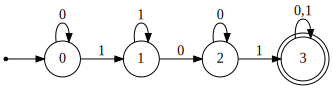

In [14]:
one_zero_one_dfa = DFA.from_subsequence(
    input_symbols={'0', '1'},
    subsequence="101",
    contains=True,
)

one_zero_one_dfa

Isn't that cool? Note the differences between the two DFA's and the strings that they accept. If you don't know the differene between a substring and subsequence, write out all the strings that are accepted by each DFA and look for patterns.

There's plenty more DFA functions to explare on the [DFA class API](../../api/fa/class-dfa). Go crazy!

- The Kleene Closure $\Sigma^{*}$ is the set of all strings obtained by concatenating a sequence of zero or more strings from $\Sigma$\.

- $\delta^{*}$ extends the definition of the transition function $\delta: Q \times \Sigma \rightarrow Q$ of any finite-state machine to $\delta^{*}: Q \times \Sigma^{*} \rightarrow Q$:
\begin{equation}
\delta^{*}(q,w) =
    \begin{cases}
    q & \text{if $w = \epsilon$} \\
    \delta^{*}(\delta(q, a), x) & \text{if $w = ax$}
    \end{cases}
\end{equation}